In [171]:
# import libraries
import pandas as pd
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time 

# classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# other libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline, imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')



In [172]:
df = pd.read_csv('creditcard.csv', on_bad_lines= 'skip')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [173]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [174]:
df.isnull().sum().max()

0

In [175]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [176]:
print("No frauds",round(df['Class'].value_counts()[0]/len(df)*100,2),"% of the dataset")
print("Frauds",round(df['Class'].value_counts()[1]/len(df)*100,2),"% of the dataset")

No frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Note: 
"""Here we noticed, how data is imbalance. Most of transactions are non-fraud. If we use the data frame as base for our predictive models and analysis we might get a lot of errors and our algorithms will probably over fit since it will 'assume' most transactions are fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud."""

[]

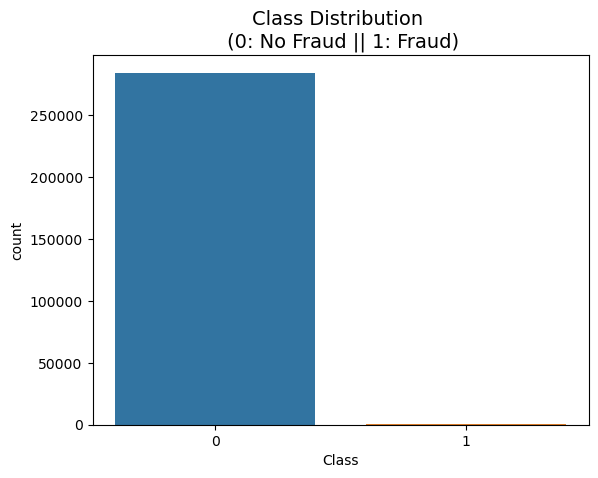

In [177]:
# plot the graph

sns.countplot(data=df,x= 'Class')
plt.title("Class Distribution \n (0: No Fraud || 1: Fraud)", fontsize =14)
plt.plot()

Distributions: 
By seeing the distribution we can have an idea how skewed are these features, we can also ee future distributions of the other 
features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future

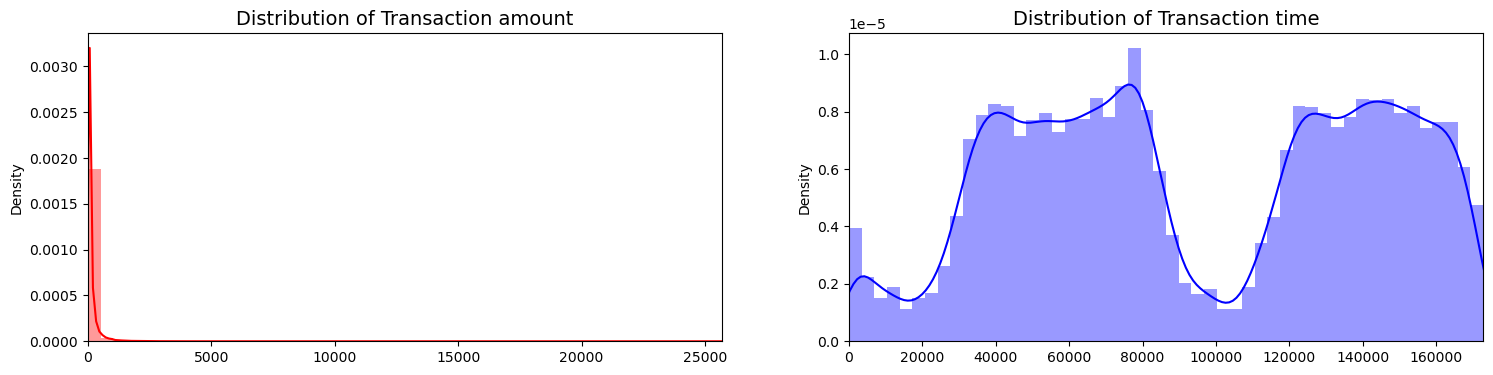

In [178]:
# plot sub-plots

fig, ax = plt.subplots(1,2,figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# plot 
sns.distplot(amount_val,ax  =ax[0], color = 'r')
ax[0].set_title("Distribution of Transaction amount", fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])


# plot 
sns.distplot(time_val,ax  =ax[1], color = 'b')
ax[1].set_title("Distribution of Transaction time", fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [179]:
"""
Steps 
1. scale Time and Amount
2. Sub sample of data have equal amount of fraud and Non fraud cases

Sub samples

Create Sub samples :
A. Overfitting
B. Wrong correlations
"""

'\nSteps \n1. scale Time and Amount\n2. Sub sample of data have equal amount of fraud and Non fraud cases\n\nSub samples\n\nCreate Sub samples :\nA. Overfitting\nB. Wrong correlations\n'

In [180]:
# Since most of our data is scaled we should scale the columns that are left to scale (Amount and Time)

# Robust is less prone to outliers
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler =StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis= 1,inplace=True)

In [181]:
scaled_amt = df['scaled_amount']
scaled_time = df['scaled_time']


df.drop(['scaled_amount','scaled_time'], axis= 1,inplace= True)
df.insert(0,'scaled_amount',scaled_amt)
df.insert(1,'scaled_time', scaled_time)

df.head(10)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.256131,-0.994960,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,-0.237686,-0.994937,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,0.262698,-0.994901,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,0.994900,-0.994901,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.255991,-0.994878,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


In [182]:
df.shape

(284807, 31)

In [183]:
# Splitting the data (Original data frame)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print("No Fraud",round(df['Class'].value_counts()[0]/ len(df)*100,2),"% of the dataset")
print("Fraud",round(df['Class'].value_counts()[1]/ len(df)*100,2),"% of the dataset")



X= df.drop('Class',axis=1)
y = df['Class']



No Fraud 99.83 % of the dataset
Fraud 0.17 % of the dataset


In [184]:
sss= StratifiedKFold(10,random_state= None, shuffle = False)

In [185]:
for train_index , test_index in sss.split(X,y):
    print("Train: ", train_index, "Test:",test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index],X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index],y.iloc[test_index]


# Check the distribution of labels

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
origianal_ytrain = original_ytrain.values
original_ytest = original_ytest.values
    

Train:  [ 11710  11841  11880 ... 284804 284805 284806] Test: [    0     1     2 ... 28522 28523 28524]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [11710 11841 11880 ... 57018 57019 57020]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [30442 30473 30496 ... 85497 85498 85499]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [ 48094  50211  50537 ... 113966 113967 113968]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [ 80760  81186  81609 ... 142427 142428 142429]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [119714 119781 120505 ... 170948 170949 170950]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [150647 150654 150660 ... 199403 199404 199405]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [154697 154718 154719 ... 227867 227868 227869]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [212516 212644 213092 ... 256351 256352 256353]
Train:  [     0      1      

In [186]:
X.iloc[2]

scaled_amount    4.983721
scaled_time     -0.994972
V1              -1.358354
V2              -1.340163
V3               1.773209
V4               0.379780
V5              -0.503198
V6               1.800499
V7               0.791461
V8               0.247676
V9              -1.514654
V10              0.207643
V11              0.624501
V12              0.066084
V13              0.717293
V14             -0.165946
V15              2.345865
V16             -2.890083
V17              1.109969
V18             -0.121359
V19             -2.261857
V20              0.524980
V21              0.247998
V22              0.771679
V23              0.909412
V24             -0.689281
V25             -0.327642
V26             -0.139097
V27             -0.055353
V28             -0.059752
Name: 2, dtype: float64

In [187]:
# random sampling

"""
In this phase of the project we will implement "Random Under Sampling" which basically consist of removing data in order to have a more balanced dataset and thus avoiding our models to overfit

Steps:
1. The first thing we have to do os determine how imbalanced is our class on the class column to determine the count for each label
2. Once we determine how many instance are considered fraud transactions , we should bring non fraud transaction to the same amount as fraud transaction
3. After implementing this technique, we have a sub sample of out data frame with a 50/50 ration with regards to our classes

"""

'\nIn this phase of the project we will implement "Random Under Sampling" which basically consist of removing data in order to have a more balanced dataset and thus avoiding our models to overfit\n\nSteps:\n1. The first thing we have to do os determine how imbalanced is our class on the class column to determine the count for each label\n2. Once we determine how many instance are considered fraud transactions , we should bring non fraud transaction to the same amount as fraud transaction\n3. After implementing this technique, we have a sub sample of out data frame with a 50/50 ration with regards to our classes\n\n'

In [188]:
# Since our class is highly skewed we shou;ld make them equivalent in order to have a normal distribution of the classes

# Lets shuffle the data before creating the subsample
df = df.sample(frac= 1)

In [189]:
fraud_df = df.loc[df['Class']==1]
Non_fraud_df = df.loc[df['Class']==0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, Non_fraud_df])

# shuffle data frame 

new_df = normal_distributed_df.sample(frac=1, random_state= 42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
267547,0.117376,0.917844,-1.202701,1.201120,-2.481474,-0.835059,3.283166,3.326540,0.797705,0.549288,...,-0.084399,0.065994,0.396095,-0.023136,0.690971,0.079074,-0.649721,-0.296941,0.422537,0
150684,-0.293440,0.108037,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,...,-0.082275,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,1
36511,0.527353,-0.541865,-1.734566,1.255916,1.240715,1.114377,-1.162280,-0.085966,-0.153363,0.580806,...,-0.246002,0.184870,0.800099,-0.078683,0.430208,-0.039916,-0.234469,-0.436934,-0.165004,0
79874,-0.236289,-0.311035,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,...,-0.067205,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1
56703,-0.296793,-0.436413,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,1


In [190]:
print("distribution of classes are as of the dataset:")
print(new_df['Class'].value_counts()/len(new_df))

distribution of classes are as of the dataset:
0    0.5
1    0.5
Name: Class, dtype: float64


[]

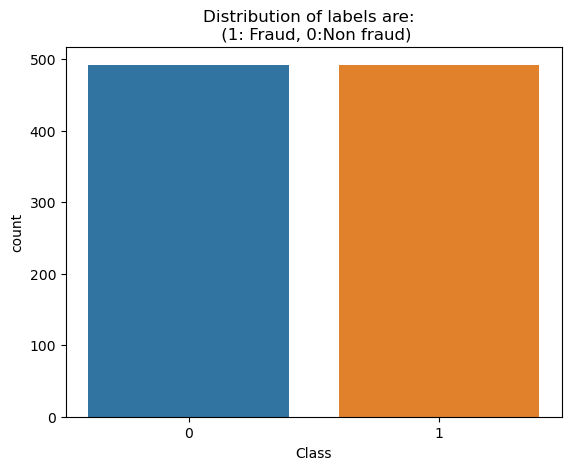

In [191]:
# plot graph

sns.countplot(new_df,x='Class')
plt.title("Distribution of labels are:  \n (1: Fraud, 0:Non fraud)")
plt.plot()

In [192]:
"""
Correlation Metrics:
Correlation metrics are the essence of understanding our data. We want to know if there are the features that influences heavily in whether is specific transaction is fraud.
However, it is important that we use the correct data frame in order to see which features are highly positive or negative corelation with regard fraud transaction

Summary and Explanation:

Negative Correlation: Lower the value, more likely the end user will be the fraud transaction
Positive Correlation: Higher the value more likely the end user will be the fraud transaction 
Box Plot: We will use box plot to better understand the distribution of the features in fraudlent and non fradulent transaction


! Note: We have to make sure, we use subsample in our correlation metrics will be affected by high imbalances in our classes. This occurs due to high imbalance in original data

"""

'\nCorrelation Metrics:\nCorrelation metrics are the essence of understanding our data. We want to know if there are the features that influences heavily in whether is specific transaction is fraud.\nHowever, it is important that we use the correct data frame in order to see which features are highly positive or negative corelation with regard fraud transaction\n\nSummary and Explanation:\n\nNegative Correlation: Lower the value, more likely the end user will be the fraud transaction\nPositive Correlation: Higher the value more likely the end user will be the fraud transaction \nBox Plot: We will use box plot to better understand the distribution of the features in fraudlent and non fradulent transaction\n\n\n! Note: We have to make sure, we use subsample in our correlation metrics will be affected by high imbalances in our classes. This occurs due to high imbalance in original data\n\n'

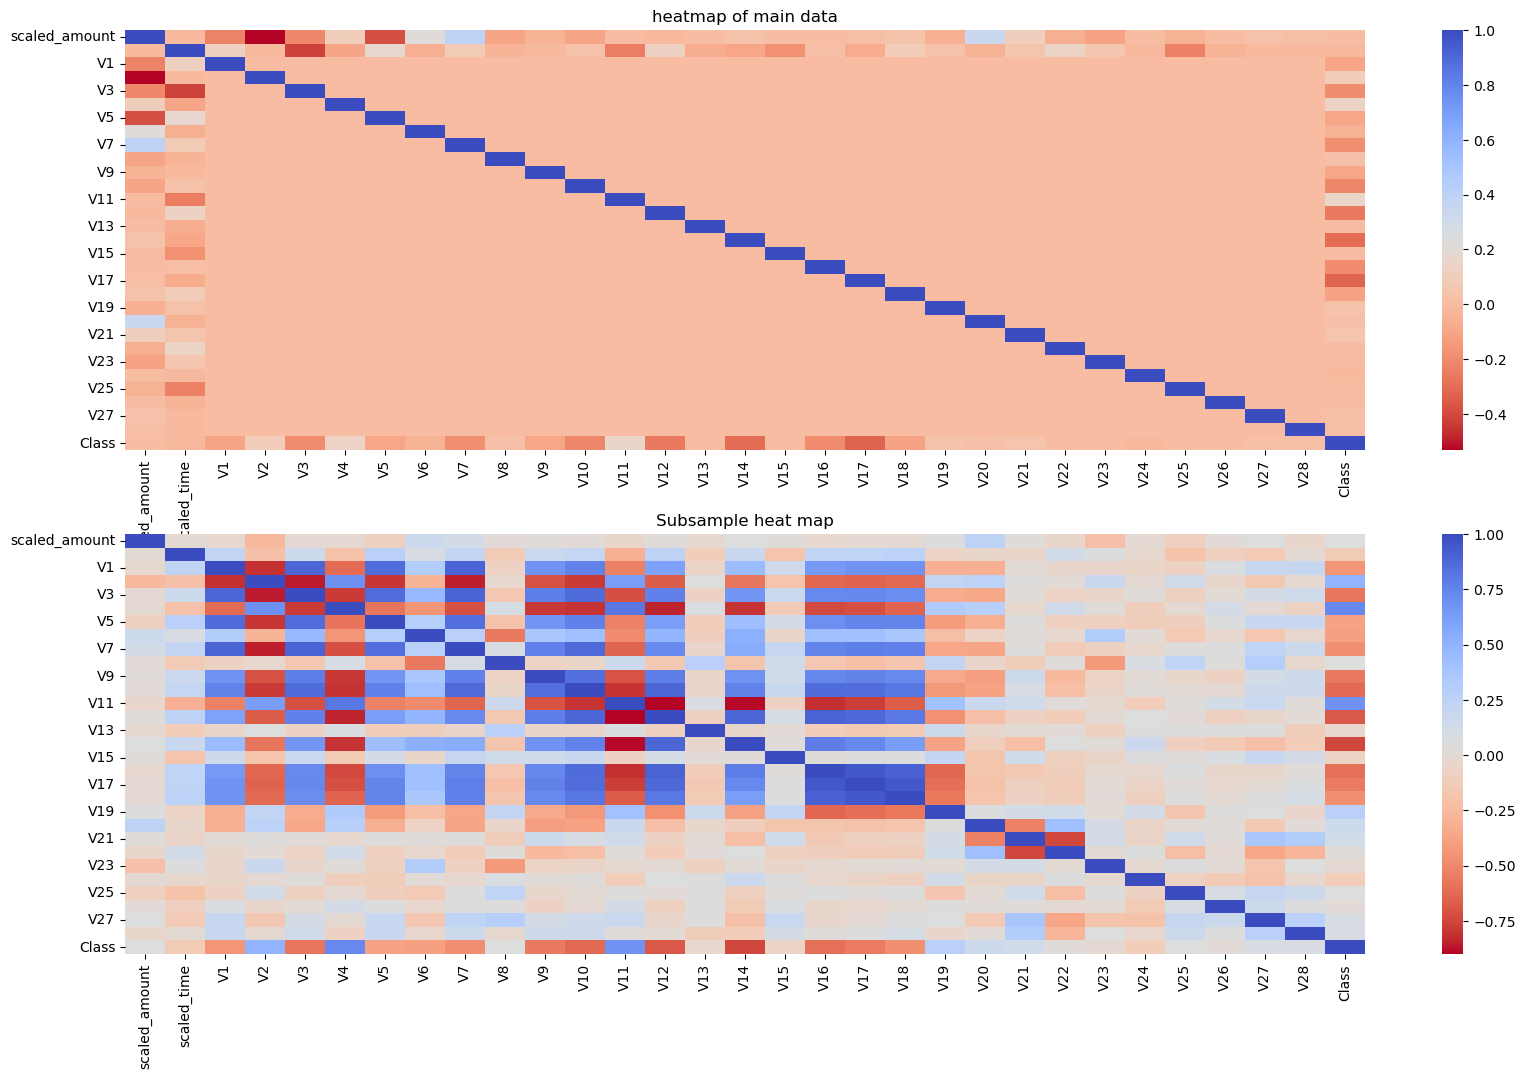

In [193]:
# plot correlation metrics of original and selected data

fig, ax = plt.subplots(2,1,figsize = (20,12))

corr = df.corr()
sns.heatmap(corr,cmap='coolwarm_r', ax= ax[0])
ax[0].set_title("heatmap of main data")

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r',ax= ax[1])
ax[1].set_title("Subsample heat map")

plt.show()

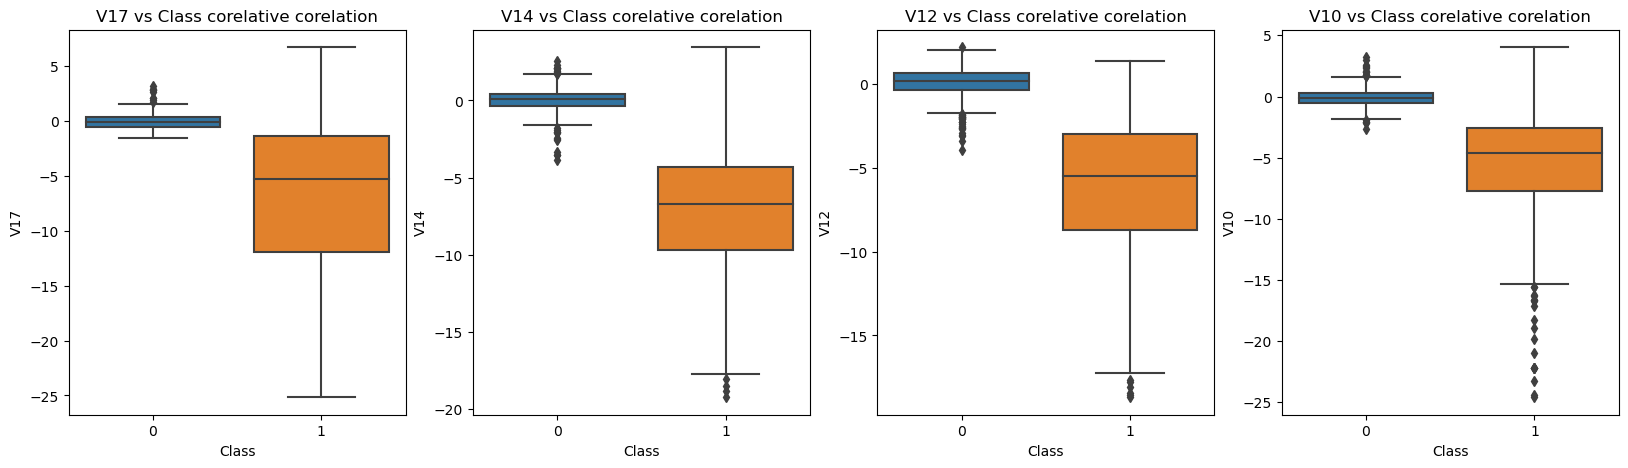

In [194]:
fig, ax = plt.subplots(ncols=4,figsize= (20,5))

# Negative Co-relation in the classes are 
sns.boxplot(new_df,x= 'Class', y= "V17",ax= ax[0])
ax[0].set_title("V17 vs Class corelative corelation")


sns.boxplot(new_df,x= 'Class', y= "V14",ax= ax[1])
ax[1].set_title("V14 vs Class corelative corelation")


sns.boxplot(new_df,x= 'Class', y= "V12",ax= ax[2])
ax[2].set_title("V12 vs Class corelative corelation")


sns.boxplot(new_df,x= 'Class', y= "V10",ax= ax[3])
ax[3].set_title("V10 vs Class corelative corelation")

plt.show()

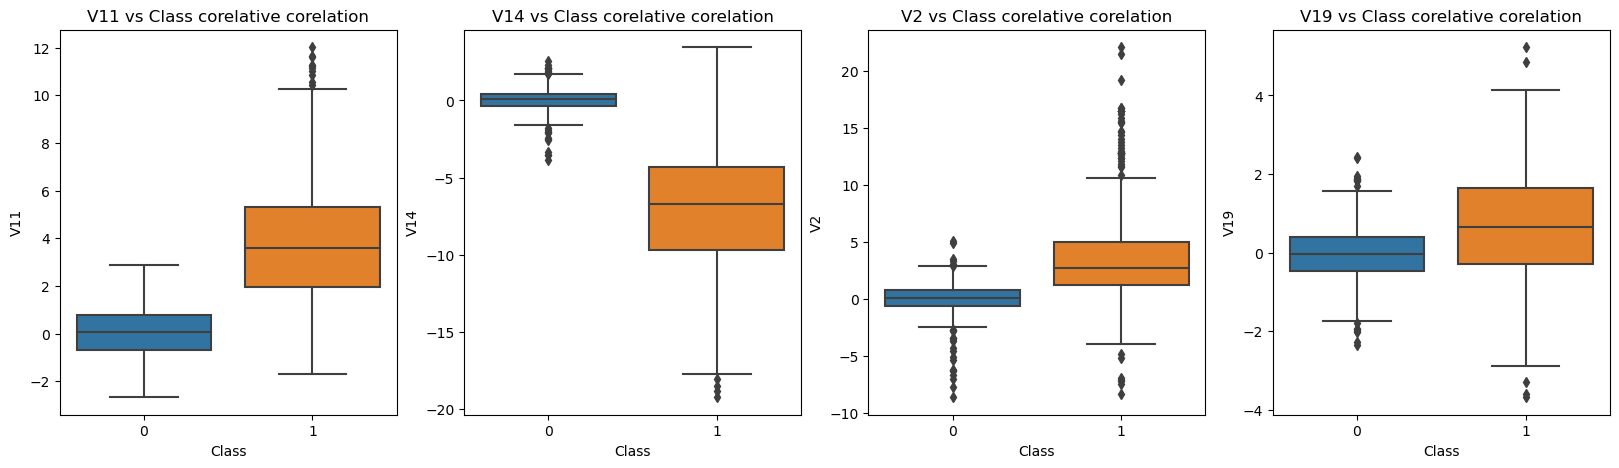

In [195]:
fig, ax = plt.subplots(ncols=4,figsize= (20,5))

# Positive Co-relation in the classes are 
sns.boxplot(new_df,x= 'Class', y= "V11",ax= ax[0])
ax[0].set_title("V11 vs Class corelative corelation")


sns.boxplot(new_df,x= 'Class', y= "V14",ax= ax[1])
ax[1].set_title("V14 vs Class corelative corelation")


sns.boxplot(new_df,x= 'Class', y= "V2",ax= ax[2])
ax[2].set_title("V2 vs Class corelative corelation")


sns.boxplot(new_df,x= 'Class', y= "V19",ax= ax[3])
ax[3].set_title("V19 vs Class corelative corelation")

plt.show()

In [196]:
# Anomaly detection

"""
Our main aim in this section is to remove extreme outliers from features that have high corelation with our classes. This will have positive impact on the accuracy of out 
models

Inter Quartile Range:
We calculate this by difference between 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percetile that in case some instances 
passes this threshold the instance will be deleted. 

Boxplots:
Besides easily seeing the 25th and 75th percentile (both end of the square) it is also easy to see extreme outliers (point beyond lower and higher extreme)

"""

'\nOur main aim in this section is to remove extreme outliers from features that have high corelation with our classes. This will have positive impact on the accuracy of out \nmodels\n\nInter Quartile Range:\nWe calculate this by difference between 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percetile that in case some instances \npasses this threshold the instance will be deleted. \n\nBoxplots:\nBesides easily seeing the 25th and 75th percentile (both end of the square) it is also easy to see extreme outliers (point beyond lower and higher extreme)\n\n'

Text(0.5, 1.0, 'Norm distribution of V10')

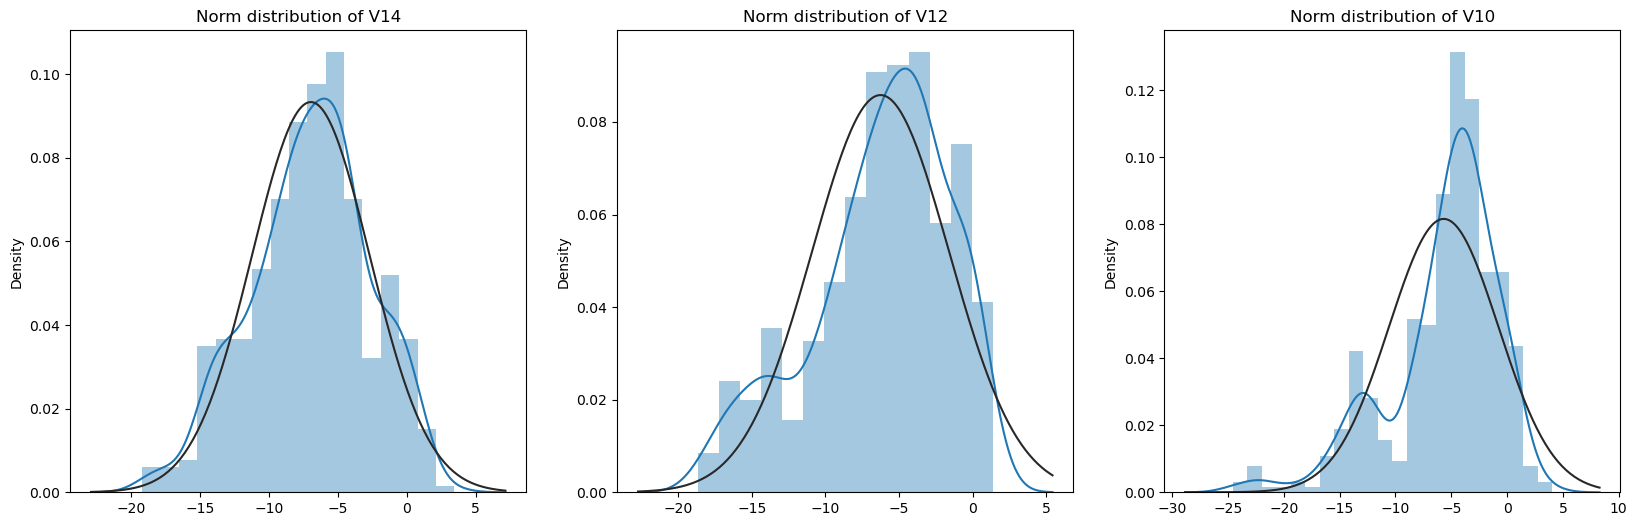

In [197]:
from scipy.stats import norm

fig, ax = plt.subplots(1,3,figsize = (20,6))


v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, fit = norm, ax = ax[0])
ax[0].set_title("Norm distribution of V14")

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, fit = norm, ax = ax[1])
ax[1].set_title("Norm distribution of V12")

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, fit = norm, ax = ax[2])
ax[2].set_title("Norm distribution of V10")

In [198]:
# Removing outliers
import numpy as np
# for V14

v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25, q75  = np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
print(f"Quartile 25th :{q25} || 75th : {q75} ")
v14_iqr = q75-q25
v14_cutoff = v14_iqr*1.5
v14_lower, v14upper = q25 - v14_cutoff , q75+v14_cutoff

# print('V14 value', v14_fraud)
print('Q25', q25)
print('Q75', q75)
print("IQR", v14_iqr)
print("Lower limit", v14_lower)
print("upper limit", v14upper)
new_df.drop(new_df[(new_df['V14']>v14upper) |(new_df['V14']< v14_lower)].index)



# for V12

v12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q25, q75  = np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
print(f"Quartile 25th :{q25} || 75th : {q75} ")
v12_iqr = q75-q25
v12_cutoff = v12_iqr*1.5
v12_lower, v12_upper = q25 - v12_cutoff , q75+v12_cutoff

# print('V12 value', v12_fraud)
print('Q25', q25)
print('Q75', q75)
print("IQR", v12_iqr)
print("Lower limit", v12_lower)
print("upper limit", v12_upper)
new_df.drop(new_df[(new_df['V14']>v12_upper) |(new_df['V14']< v12_lower)].index)



# for V10

v10_fraud = new_df['V10'].loc[new_df['Class']==1].values
q25, q75  = np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
print(f"Quartile 25th :{q25} || 75th : {q75} ")
v10_iqr = q75-q25
v10_cutoff = v12_iqr*1.5
v10_lower, v10_upper = q25 - v10_cutoff , q75+v10_cutoff

# print('V12 value', v12_fraud)
print('Q25', q25)
print('Q75', q75)
print("IQR", v10_iqr)
print("Lower limit", v10_lower)
print("upper limit", v10_upper)
new_df.drop(new_df[(new_df['V10']>v10_upper) |(new_df['V10']< v10_lower)].index)


Quartile 25th :-9.692722964972386 || 75th : -4.282820849486865 
Q25 -9.692722964972386
Q75 -4.282820849486865
IQR 5.409902115485521
Lower limit -17.807576138200666
upper limit 3.8320323237414167
Quartile 25th :-8.688176521812306 || 75th : -2.97408802538493 
Q25 -8.688176521812306
Q75 -2.97408802538493
IQR 5.714088496427376
Lower limit -17.25930926645337
upper limit 5.597044719256134
Quartile 25th :-7.7566982278474725 || 75th : -2.6141839131895623 
Q25 -7.7566982278474725
Q75 -2.6141839131895623
IQR 5.142514314657911
Lower limit -16.327830972488535
upper limit 5.956948831451502


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
267547,0.117376,0.917844,-1.202701,1.201120,-2.481474,-0.835059,3.283166,3.326540,0.797705,0.549288,...,-0.084399,0.065994,0.396095,-0.023136,0.690971,0.079074,-0.649721,-0.296941,0.422537,0
150684,-0.293440,0.108037,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,...,-0.082275,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,1
36511,0.527353,-0.541865,-1.734566,1.255916,1.240715,1.114377,-1.162280,-0.085966,-0.153363,0.580806,...,-0.246002,0.184870,0.800099,-0.078683,0.430208,-0.039916,-0.234469,-0.436934,-0.165004,0
79874,-0.236289,-0.311035,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,...,-0.067205,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1
56703,-0.296793,-0.436413,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123301,-0.293440,-0.091824,-1.298359,1.079671,-0.180678,1.287839,1.858273,-2.223695,0.525167,-0.096874,...,-0.187572,-0.332983,-0.851270,-0.370800,0.298242,0.442930,-0.522832,0.000105,0.135698,1
247673,3.156012,0.810172,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,...,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,1
245412,-0.167540,0.799469,1.900299,-0.274576,-0.408940,1.407106,-0.281969,0.200473,-0.415199,0.207998,...,-0.332944,-0.497485,-1.208370,0.400899,-0.505144,-0.351983,-1.096414,0.047320,-0.045783,0
6472,-0.293440,-0.904052,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,...,0.204138,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1


Text(0.5, 1.0, 'Norm distribution of V10')

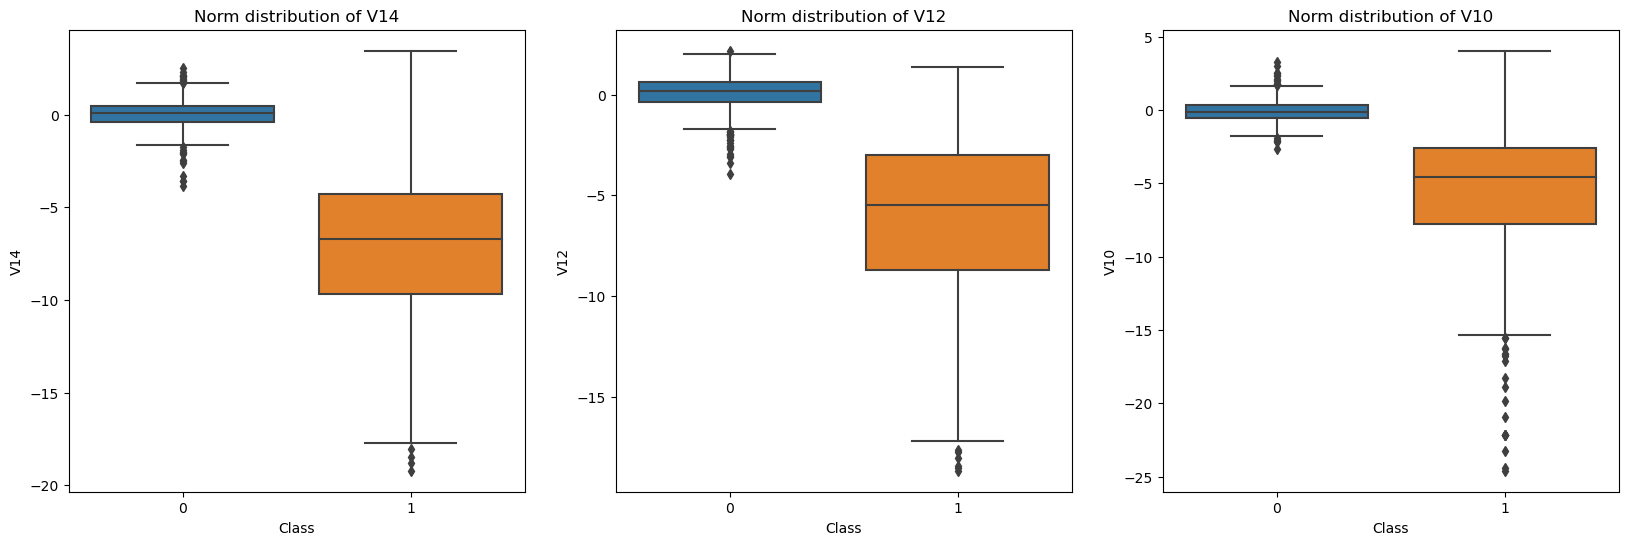

In [199]:
from scipy.stats import norm

fig, ax = plt.subplots(1,3,figsize = (20,6))

sns.boxplot(data= new_df,x="Class",y= "V14",ax= ax[0])
ax[0].set_title("Norm distribution of V14")

sns.boxplot(data= new_df,x="Class",y= "V12",ax= ax[1])
ax[1].set_title("Norm distribution of V12")

sns.boxplot(data= new_df,x="Class",y= "V10",ax= ax[2])
ax[2].set_title("Norm distribution of V10")

In [200]:
# Dimensionality reduction

In [201]:
new_df.shape

(984, 31)

In [202]:
X = new_df.drop('Class', axis= 1 )
y = new_df['Class']


# t-sne implementation 

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-Sne time ", round((t1-t0),2))

# PCA Implementation


t0 = time.time()
X_reduced_pca = PCA(n_components = 2, random_state= 42).fit_transform(X.values)
t1 = time.time()
print("PCA took ", round((t1-t0)),2)


# TruncatedSDV
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated took", round((t1-t0),2))



T-Sne time  3.29
PCA took  0 2
Truncated took 0.01


[]

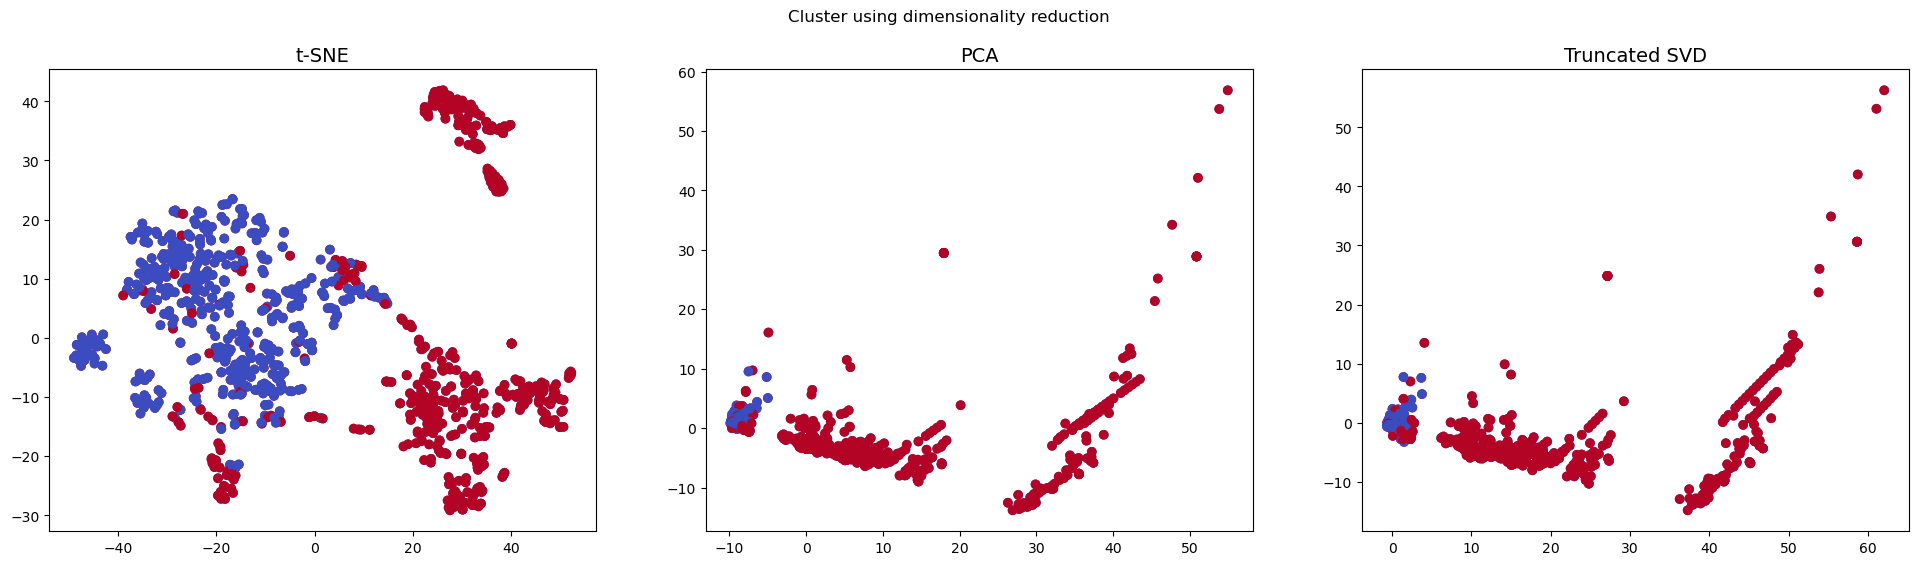

In [203]:
fig , ax = plt.subplots(1,3,figsize=(24,6))
fig.suptitle("Cluster using dimensionality reduction")

plue_patch = mpatches.Patch(color= '#0A0AFF', label = 'No Fraud')
red_patch = mpatches.Patch(color= '#AF0000', label = 'Fraud')


# t-sne plot

ax[0].scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1], c= (y==0), cmap='coolwarm', label= 'No Fraud' )
ax[0].scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1], c= (y==1), cmap='coolwarm', label= 'Fraud' )
ax[0].set_title('t-SNE', fontsize =14)


# PCA plot

ax[1].scatter(X_reduced_pca[:,0],X_reduced_pca[:,1], c= (y==0), cmap='coolwarm', label= 'No Fraud' )
ax[1].scatter(X_reduced_pca[:,0],X_reduced_pca[:,1], c= (y==1), cmap='coolwarm', label= 'Fraud' )
ax[1].set_title('PCA', fontsize =14)


# TruncatedSVD scattered

ax[2].scatter(X_reduced_svd[:,0],X_reduced_svd[:,1], c= (y==0), cmap='coolwarm', label= 'No Fraud' )
ax[2].scatter(X_reduced_svd[:,0],X_reduced_svd[:,1], c= (y==1), cmap='coolwarm', label= 'Fraud' )
ax[2].set_title('Truncated SVD', fontsize =14)


plt.plot()

In [204]:
# Classifiers (Under sampling) 
# In this section we will train 4 types of classifiers and decide which classifier is working best and more effective in detection fraud detection. Before we have to split our into train and test test split


"""
Summary
1. Logistic regression: 
2. Grid Search CV
3. Logistic regression has the best reviewing Operating characteristics score (ROC), meaning that Logistics regression pretty accurately seperate fraud and non fraud transaction
"""

'\nSummary\n1. Logistic regression: \n2. Grid Search CV\n3. Logistic regression has the best reviewing Operating characteristics score (ROC), meaning that Logistics regression pretty accurately seperate fraud and non fraud transaction\n'

In [205]:
X = new_df.drop('Class', axis= 1)
y = new_df['Class']

In [206]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [208]:
classifier = {

    "LogisticRegression" : LogisticRegression(),
    "KNearest":KNeighborsClassifier(),
    "Support vector calssifier": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

In [209]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifier.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier,X = X_train,y= y_train,cv= 5 )

    print("Classifier: ", classifier.__class__.__name__, "Has a training score of ", round(training_score.mean(),2)*100, "% accuracy score")


Classifier:  LogisticRegression Has a training score of  95.0 % accuracy score
Classifier:  KNeighborsClassifier Has a training score of  94.0 % accuracy score
Classifier:  SVC Has a training score of  94.0 % accuracy score
Classifier:  DecisionTreeClassifier Has a training score of  90.0 % accuracy score


In [213]:
#  Using grid search CV to find the best parameter

from sklearn.model_selection import GridSearchCV

# Logistics regression
log_reg_param = {'penalty':['l1','l2'], 'C': [0.001, 0.01,0.1,1,10,100]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_param)

grid_log_reg.fit(X_train, y_train)
# Here we automatically get the logistic regression with the best parameters
log_grid = grid_log_reg.best_estimator_

print("Log grid best parameters are:", log_grid)


# Grid KNear
knear_param = { 
    'n_neighbors': list(range(2,5,1)),
    "algorithm": ['auto', 'ball_tree','kd_tree','brute']
    }


kn_classifier = GridSearchCV(KNeighborsClassifier(), knear_param)
kn_classifier.fit(X_train,y_train)


# SVC Classifier

svc_param = {
'C': [0.5,0.7,0.9,1],
'kernel': ['rbf','poly','sigmoid','linear']
}

grid_svc= GridSearchCV(SVC(), svc_param)
grid_svc.fit(X_train,y_train)

print("Best estimator of SVC is:", grid_svc.best_estimator_)


# Decision tree

tree_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(2,4,1)),
    'min_samples_leaf': list(range(5,7,1))
}

d_tree = GridSearchCV(DecisionTreeClassifier(), tree_param)
d_tree.fit(X_train,y_train)
# d tree best estimator
tree_clf = d_tree.best_estimator_
print("Best score of Decision tree:", tree_clf)

Log grid best parameters are: LogisticRegression(C=0.1)
Best estimator of SVC is: SVC(C=0.9, kernel='linear')
Best score of Decision tree: DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [220]:
# overfitting case
log_reg_score = cross_val_score(log_grid,X_train,y_train, cv= 5)
print("Mean score of log reg score:",round(log_reg_score.mean()*100,2),"%")

kn_classifier_score = cross_val_score(kn_classifier,X_train,y_train, cv= 5)
print("Mean score of k nearest neighbor score:",round(kn_classifier_score.mean()*100,2),"%")

svc_score = cross_val_score(grid_svc,X_train,y_train, cv= 5)
print("Mean score svc score:",round(svc_score.mean()*100,2),"%")

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Mean score of log reg score: 94.92 %
Mean score of k nearest neighbor score: 94.03 %
Mean score svc score: 94.03 %
DecisionTree Classifier Cross Validation Score 92.88%


In [221]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")

    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")
    
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Ai\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

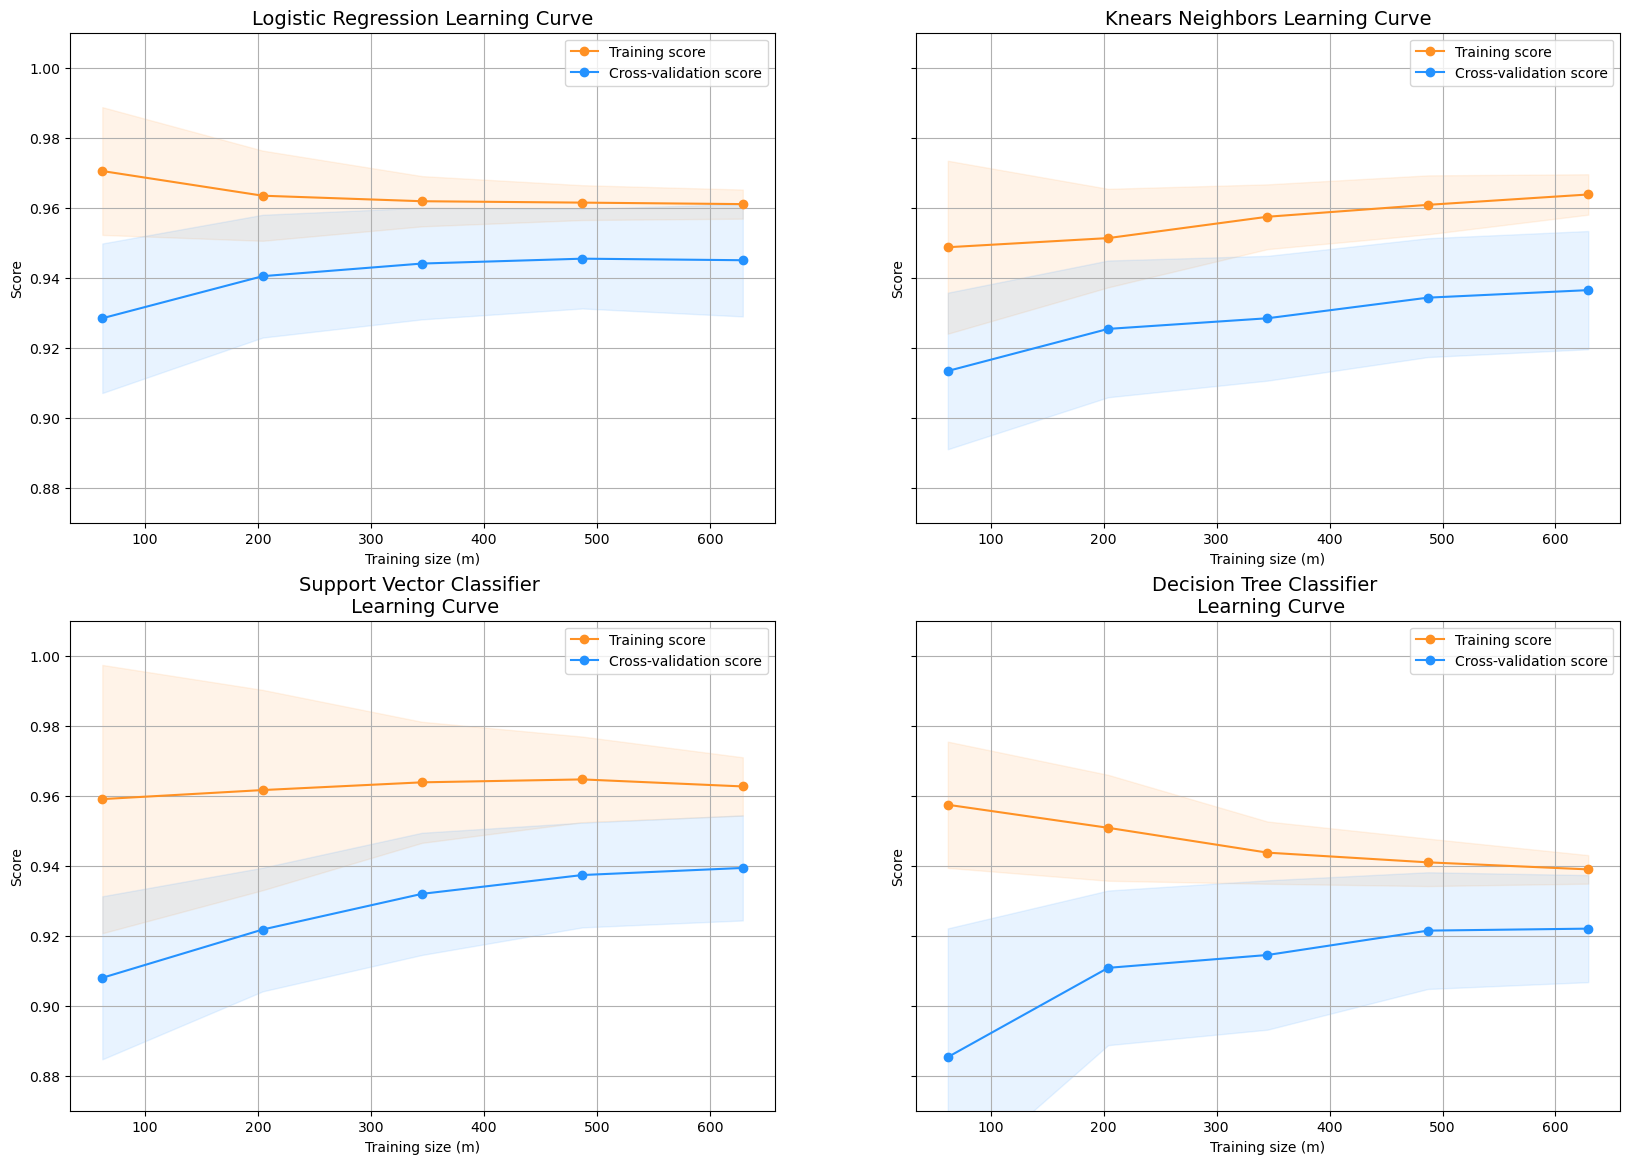

In [222]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_grid, kn_classifier, grid_svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [223]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_grid, X_train, y_train, cv=5,method="decision_function")

knears_pred = cross_val_predict(kn_classifier, X_train, y_train, cv=5)

svc_pred = cross_val_predict(grid_svc, X_train, y_train, cv=5,method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [224]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9833494925990562
KNears Neighbors:  0.9392993342382523
Support Vector Classifier:  0.97712494344257
Decision Tree Classifier:  0.9288572167280718


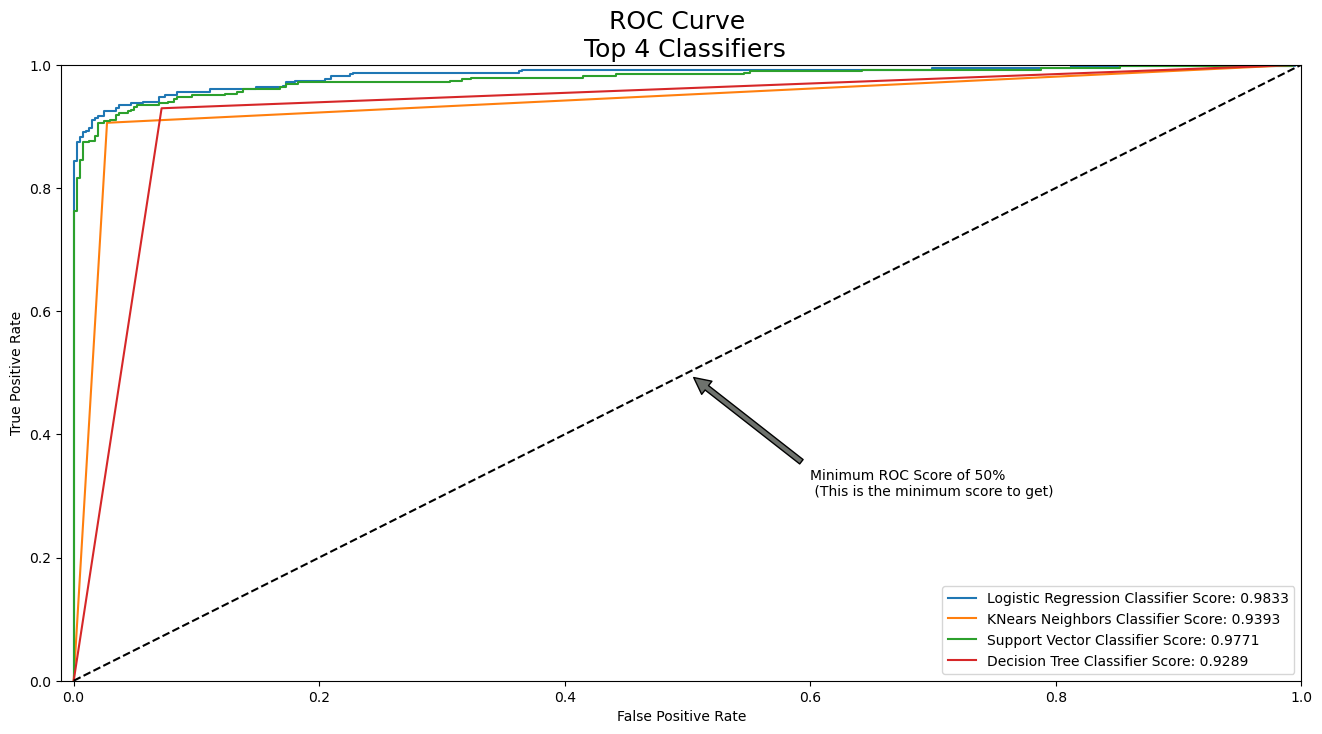

In [226]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

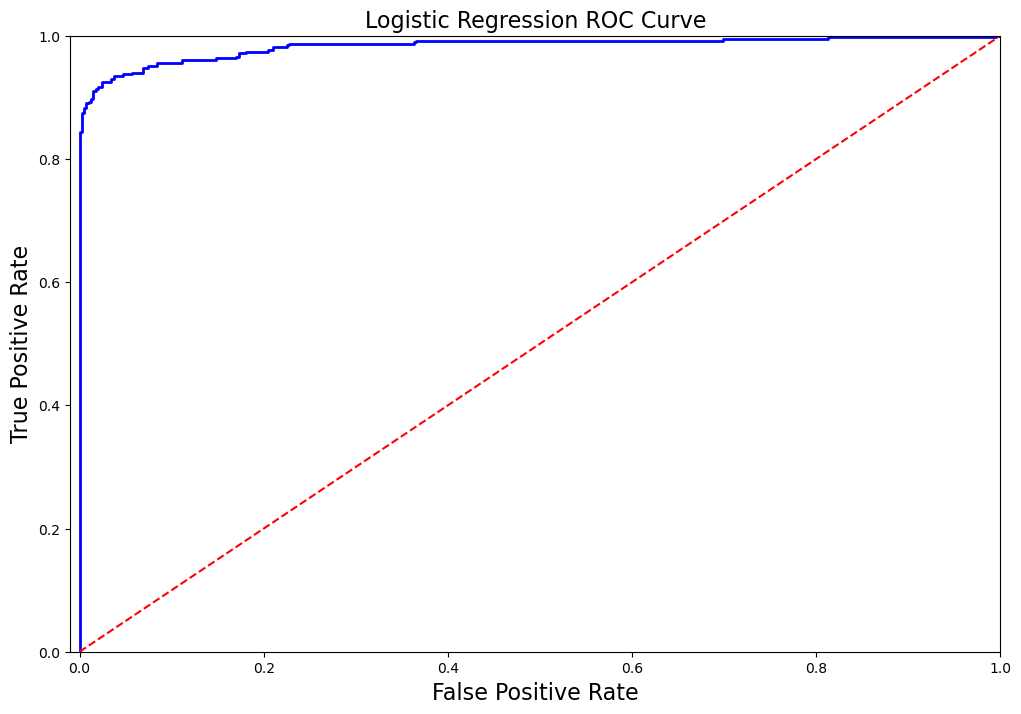

In [227]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()